In [1]:
# Statystyczna analiza danych medycznych - Projekt
# Tobiasz Puślecki 241354

# Etap 1
# -Statystyka opisowa
# -Testy parametryczne
# -Testy nieparametryczne

import pandas as pd
import numpy as np
# Dane na temat sprzedaży gier video w latach 1980-2020
# https://www.kaggle.com/gregorut/videogamesales
dataFile = pd.read_csv('vgsales.csv')
dataFile = dataFile.drop(['Rank'],axis=1)
dataFile

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [2]:
# Liczba gier wydanych na poszczególne platformy
# Znacząca przewaga konsol japońskich - 7/10 w pierwszej dziesiątce
# Najwięcej gier wydano na konsole, które sprzedały się w największej ilości
x = dataFile['Name'].groupby(dataFile['Platform']).count().sort_values(ascending=False)
x

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Name, dtype: int64

<AxesSubplot:xlabel='Year'>

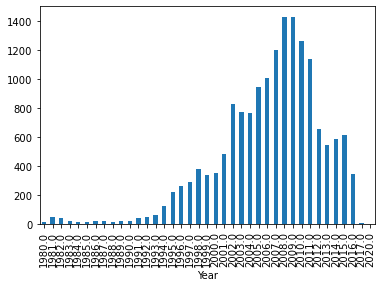

In [3]:
# Globalna ilość sprzedanych gier w zależności od roku
# Zbiór danych prawdopodobnie niepełny - według innych danych branża zwiększa swoje udziały rokrocznie
# Tutaj widać spadek, najpewniej przez niepełność zbioru
import matplotlib.pyplot as plt
data = dataFile['Name'].groupby(dataFile['Year']).count()#.sort_values(ascending=False)
data.plot.bar(width=0.5)


<AxesSubplot:xlabel='Genre'>

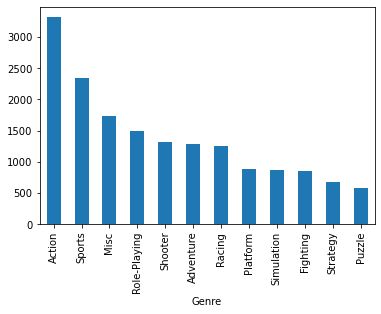

In [4]:
# Ilość gier w bazie danych zależności od gatunku sumarycznie
# Najwięcej gier akcji i sportowych
# Najmniej gier strategicznych i logicznych
data = dataFile['Name'].groupby(dataFile['Genre']).count().sort_values(ascending=False)
data.plot.bar(width=0.5)

In [5]:
# Najpopularniejsi wydawcy ostatnich lat
# Znacząca przewaga największych firm - amerykańskich i japońskich
dataFile['Name'].groupby(dataFile['Publisher']).count().sort_values(ascending=False)

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Playmates                          1
Playmore                           1
Plenty                             1
Pony Canyon                        1
SCS Software                       1
Name: Name, Length: 578, dtype: int64

<AxesSubplot:xlabel='Genre'>

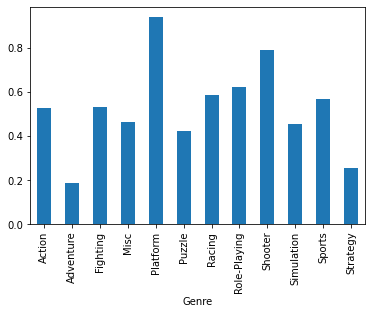

In [6]:
# Średnia sprzedaż globalna w zależności od gatunku
# Średnio najlepiej sprzedawały się gry platformowe i strzelanki
data = dataFile['Global_Sales'].groupby(dataFile['Genre']).mean()
data.plot.bar(width=0.5)

In [7]:
# Mediana sprzedarzy w zależności od gatunku
dataFile['Global_Sales'].groupby(dataFile['Genre']).median()

Genre
Action          0.190
Adventure       0.060
Fighting        0.210
Misc            0.160
Platform        0.280
Puzzle          0.110
Racing          0.190
Role-Playing    0.185
Shooter         0.230
Simulation      0.160
Sports          0.220
Strategy        0.090
Name: Global_Sales, dtype: float64

In [8]:
# Najpopularniejsze tytuły wszechczasów
# Pięć najlepszych gier to gry japońskie od Nintendo
dataFile['Global_Sales'].groupby(dataFile['Name']).min().sort_values(ascending=False)

Name
Wii Sports                                                         82.74
Mario Kart Wii                                                     35.82
Wii Sports Resort                                                  33.00
Pokemon Red/Pokemon Blue                                           31.37
New Super Mario Bros.                                              30.01
                                                                   ...  
Moto Racer Advance                                                  0.01
Bookworm Deluxe                                                     0.01
Rave Master: Special Attack Force!                                  0.01
Raven Squad: Operation Hidden Dagger                                0.01
Pachitte Chonmage Tatsujin 16: Pachinko Hissatsu Shigotojin III     0.01
Name: Global_Sales, Length: 11493, dtype: float64

In [9]:
# Sumaraczna sprzedaż wszystkich tytułów w zależności od gatunku
# Najwięcej sumarycznie sprzedano kolejno gier sportowych, platformowych, wyścigowych, RPG
# Są to najpopularniejsze gatunki trafiające do największego grona graczy
# najmniej sprzedano gier strategicznych - są najbardziej skomplikowane i przez to mało popularne
dataFile['Global_Sales'].groupby(dataFile['Genre']).max().sort_values(ascending=False)

Genre
Sports          82.74
Platform        40.24
Racing          35.82
Role-Playing    31.37
Puzzle          30.26
Misc            29.02
Shooter         28.31
Simulation      24.76
Action          21.40
Fighting        13.04
Adventure       11.18
Strategy         5.45
Name: Global_Sales, dtype: float64

In [10]:
# Wariancja globalnej sprzedaży w zależności od gatunku
dataFile['Global_Sales'].groupby(dataFile['Genre']).var()

Genre
Action          1.337324
Adventure       0.263456
Fighting        0.913868
Misc            1.728925
Platform        6.683540
Puzzle          2.438958
Racing          2.763697
Role-Playing    2.916953
Shooter         3.302446
Simulation      1.428634
Sports          4.366912
Strategy        0.271345
Name: Global_Sales, dtype: float64

In [11]:
# Odchylenie standardowe globalnej sprzedaży w zależności od gatunku
dataFile['Global_Sales'].groupby(dataFile['Genre']).std()

Genre
Action          1.156427
Adventure       0.513280
Fighting        0.955965
Misc            1.314886
Platform        2.585254
Puzzle          1.561716
Racing          1.662437
Role-Playing    1.707909
Shooter         1.817263
Simulation      1.195255
Sports          2.089716
Strategy        0.520908
Name: Global_Sales, dtype: float64

In [12]:
# Podział na kwartyle globalnej sprzedaży w zależności od gatunku
dataFile['Global_Sales'].groupby(dataFile['Genre']).describe()

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,3316.0,0.528100,1.156427,0.01,0.07,0.190,0.5000,21.40
Adventure,1286.0,0.185879,0.513280,0.01,0.02,0.060,0.1600,11.18
Fighting,848.0,0.529375,0.955965,0.01,0.08,0.210,0.5500,13.04
Misc,1739.0,0.465762,1.314886,0.01,0.06,0.160,0.4100,29.02
Platform,886.0,0.938341,2.585254,0.01,0.09,0.280,0.7900,40.24
Puzzle,582.0,0.420876,1.561716,0.01,0.04,0.110,0.3075,30.26
Racing,1249.0,0.586101,1.662437,0.01,0.07,0.190,0.5300,35.82
Role-Playing,1488.0,0.623233,1.707909,0.01,0.07,0.185,0.5225,31.37
Shooter,1310.0,0.791885,1.817263,0.01,0.08,0.230,0.7275,28.31


In [13]:
#Testy parametryczne
#T-test
#ANOVA

# Zbiór video - zbiór ocen poszczególnych filmów w zależności od płci respondenta
# https://www.sheffield.ac.uk/mash/statistics/datasets
dataFile2 = pd.read_csv('Video_R.csv')
dataFile2

,Person,Gender,Heardofcondition,Set,@1st,@2nd,@3rd,@4th,Combination,VideoAGenUnderstandingCONDITION,VideoBdoctorUnderstandingCONDITION,VideoCOldUnderstandingCONDITION,DEMOUnderstandingCONDITION,TotalAGen,TotalBdoc,TotalCOld,TotalDDEMO
0,1,1,1,1,4,1,3,2,4132,5,5,3,5,25,23,13,22
1,2,2,1,1,4,1,3,2,4132,5,5,5,5,23,23,20,22
2,3,2,2,1,4,1,3,2,4132,4,4,2,5,20,17,14,23
3,4,2,0,1,4,1,3,2,4132,5,5,5,5,24,24,23,25
4,5,2,2,1,4,1,3,2,4132,5,5,4,5,25,22,18,23
5,6,2,1,11,1,3,4,2,1342,5,4,5,5,24,22,23,25
6,7,2,1,11,1,3,4,2,1342,5,4,2,5,25,22,9,21
7,8,1,1,11,1,3,4,2,1342,4,4,2,5,24,23,6,21
8,9,2,0,11,1,3,4,2,1342,5,4,3,5,25,21,11,23
9,10,2,0,11,1,3,4,2,1342,5,5,1,5,24,23,5,25


In [14]:
#T-test

# Test dwustronny dla hipotezy zerowej - sprawdza czy 2 niezależne próbki mają identyczne 
# wartości średnie (oczekiwane). 
# Test zakłada, że populacje mają domyślnie identyczne wariancje.
# Tutaj wynik pozytywny - Róznica statystyczna istnieje - przewaga TotalAGen
from scipy.stats import ttest_ind
cat1 = dataFile2[dataFile2['Gender']==1]
cat2 = dataFile2[dataFile2['Gender']==2]

stat, p = ttest_ind(cat1['TotalAGen'], cat2['TotalDDEMO'])

alpha = 0.05

print("cat1 vs cat2 - stat: %.2f, p: %.4f" % (stat, p))
if p<alpha:
    print('Róznica statystyczna istnieje')
    if stat>0:
        print('Przewaga 1')
    else:
        print('Przewaga 2')
else:
    print('Róznica statystyczna nie istnieje')



cat1 vs cat2 - stat: 2.15, p: 0.0451
Róznica statystyczna istnieje
Przewaga 1


In [15]:
#ANOVA

# One-way ANOVA testuje hipotezę zerową, że dwie lub więcej grup ma taką samą średnią w populacji.
# Tutaj dla dwóch płci różnice statystyczne nie istnieją

from scipy.stats import f_oneway

stat, p = f_oneway(dataFile2['Gender']==1, dataFile2['Gender']==2)

if p<alpha:
    print("Różnice statystyczne istnieją, p=", p)
else:
    print("Różnice statystyczne nie istnieją")

Różnice statystyczne nie istnieją


In [16]:
#Testy nieparametryczne

# Zbiór video - zbiór ocen poszczególnych filmów w zależności od płci respondenta
# https://www.sheffield.ac.uk/mash/statistics/datasets

#Shapiro-Wilk 
# Testuje hipotezę zerową, że dane pochodzą z rozkładu normalnego.
# Hipoteza zerowa potwierdzona - dane z próbki pochodzą z rozkładu normalnego dla TotalAGen

from scipy.stats import shapiro

stat, p = shapiro(dataFile2['TotalAGen'])
if p<alpha:
    print("Różnice statystyczne istnieją, p=", p)
else:
    print("Różnice statystyczne nie istnieją")

Różnice statystyczne istnieją, p= 3.957209628424607e-05


In [17]:
# Hipoteza zerowa potwierdzona - dane z próbki nie pochodzą z rozkładu normalnego dla TotalDDEMO

stat, p = shapiro(dataFile2['TotalDDEMO'])
if p<alpha:
    print("Różnice statystyczne istnieją, p=", p)
else:
    print("Różnice statystyczne nie istnieją")

Różnice statystyczne nie istnieją


In [18]:
#Wilcoxon

# Test Wilcoxona testuje hipotezę zerową, że dwie powiązane ze sobą sparowane próbki pochodzą
# z tego samego rozkładu. W szczególności testuje, czy rozkład różnic x - y jest symetryczny
# względem zera. Jest to nieparametryczna wersja sparowanego testu T.
# Tutaj widać, że TotalAGen i TotalDDEMO pochodzą z tego samego rozkładu
from scipy.stats import wilcoxon
stat, p = wilcoxon(dataFile2['TotalAGen'], dataFile2['TotalDDEMO'])
if p<alpha:
    print("Różnice statystyczne istnieją, p=", p)
else:
    print("Różnice statystyczne nie istnieją")

Różnice statystyczne istnieją, p= 0.003333988593281021


/Users/tobiaszpuslecki/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [19]:
#Test Friedmana Rank

"""
Test Friedmana służy do określenia, czy istnieje statystycznie istotna różnica między średnimi trzech 
lub więcej grup, w których te same osoby pojawiają się w każdej grupie.

Test Friedmana wykorzystuje następujące hipotezy zerowe i alternatywne:
Hipoteza zerowa (H0): Średnie oceny dla każdej populacji są równe.
Hipoteza alternatywna: (Ha): Przynajmniej jedna średnia z populacji jest różna od pozostałych.

Ponieważ ta wartość p jest mniejsza niż 0,05, możemy odrzucić hipotezę zerową, 
że średnia ocena jest taka sama dla wszystkich respondentów w zależności od płci
"""
from scipy.stats import friedmanchisquare

stat, p = friedmanchisquare(dataFile2['TotalAGen'], dataFile2['TotalBdoc'], dataFile2['TotalCOld'], dataFile2['TotalDDEMO'])
if p<alpha:
    print("Różnice statystyczne istnieją, p=", p)
else:
    print("Różnice statystyczne nie istnieją")
# post-hoc

import scikit_posthocs as sp
data = np.array([dataFile2['TotalAGen'], dataFile2['TotalBdoc'], dataFile2['TotalCOld'], dataFile2['TotalDDEMO']])
sp.posthoc_nemenyi_friedman(data.T)

Różnice statystyczne istnieją, p= 5.451589716136096e-09


,0,1,2,3
0,1.00000,0.07944,0.001,0.13943
1,0.07944,1.00000,0.001,0.90000
2,0.00100,0.00100,1.000,0.00100
3,0.13943,0.90000,0.001,1.00000


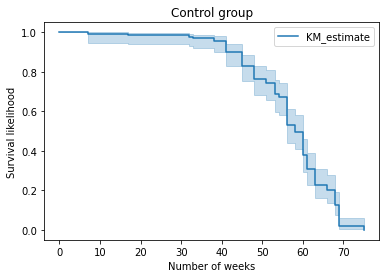

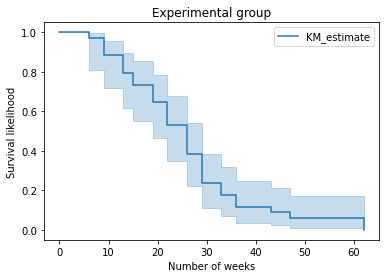

In [20]:
# Krzywe przezycia - wykres Kaplana Mayera

# Zbiór waltons - biblioteka lifelines, genotypy i liczba dni przeżytych u muchy Drosophila. 
import matplotlib.pyplot as plt
from lifelines.datasets import load_waltons
from lifelines import KaplanMeierFitter

df = load_waltons()

dfControl = df[df.group=='control']

X=dfControl['T']
Y=dfControl['E']

kmf=KaplanMeierFitter()
kmf.fit(X, Y)
kmf.plot()

plt.title("Control group")
plt.xlabel("Number of weeks")
plt.ylabel("Survival likelihood")
plt.show()
plt.clf()

dfExperimental = df[df.group!='control']

X=dfExperimental['T']
Y=dfExperimental['E']

kmf=KaplanMeierFitter()
kmf.fit(X, Y)
kmf.plot()

plt.title("Experimental group")
plt.xlabel("Number of weeks")
plt.ylabel("Survival likelihood")
plt.show()

In [21]:
# Regresja logistyczna
# Selekcja cech i klasyfikacja w pięciu foldach
# za metsi.github.io
# Zbiór Ice cream - https://www.sheffield.ac.uk/mash/statistics/datasets

# Miarą wyniku w tej analizie jest ulubiony smak lodów respondenta - waniliowy, czekoladowy lub truskawkowy
# Jakie związki istnieją z wynikami w grze wideo, wynikami w puzzlach i płcią?
# ice_cream jest zmienną zależną (zmienną przewidywaną).
# Female, video i puzzle są zmiennymi niezależnymi (predyktorami).

from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from sklearn.feature_selection import SelectKBest, chi2

iceCreams = np.genfromtxt('Ice_cream_R.csv', delimiter=",")
iceCreams = np.delete(iceCreams, 0, 0) # pominięcie nagłówka tabeli

X = iceCreams[:, :]
X = np.delete(iceCreams, 0, 1)
X = np.delete(X, 0, 1)
y = iceCreams[:, -4].astype(int)

X = SelectKBest(k=3).fit_transform(X, y)

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for id, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = LogisticRegression(random_state=42, max_iter=100).fit(X_train, y_train)
    y_preds = clf.predict(X_test)
    print(balanced_accuracy_score(y_test, y_preds))


0.4887218045112782
0.5631313131313131
0.5075757575757576
0.5757575757575758
0.553030303030303


0.4887218045112782
0.5463659147869675


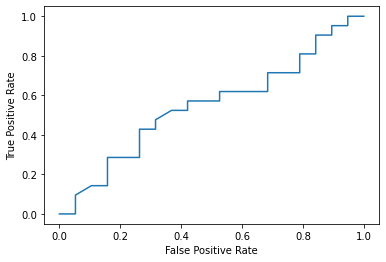

0.5631313131313131
0.48737373737373735


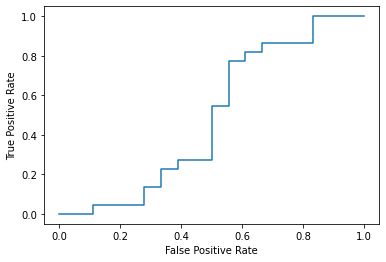

0.5075757575757576
0.6363636363636364


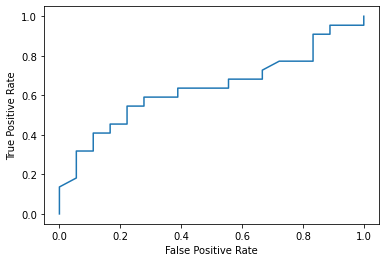

0.5757575757575758
0.7045454545454547


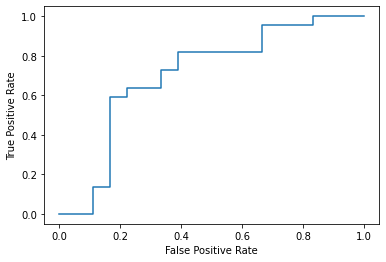

0.553030303030303
0.5555555555555556


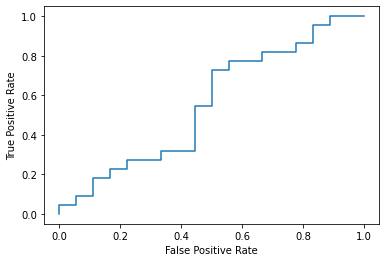

In [22]:
# ROC - Wizualizacja jakości klasyfikacji
# Regresja logistyczna
# Selekcja cech i klasyfikacja w pięciu foldach
# za metsi.github.io

from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for id, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    lr = LogisticRegression(max_iter=600)
    lr.fit(X_train, y_train)
    y_preds = lr.predict(X_test)
        
    y_score = lr.decision_function(X_test)
    fpr, tpr, _none = roc_curve(y_test, y_score, pos_label=lr.classes_[1])
    
    print(balanced_accuracy_score(y_test, y_preds))
    print(auc(fpr, tpr)) # area under curve
    
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    plt.show()